<a href="https://colab.research.google.com/github/eggheadsv/PyCaretClassificationCrashCourse/blob/main/%D0%91%D0%BE%D0%BB%D0%B5%D0%B7%D0%BD%D0%B8_%D1%81%D0%B5%D1%80%D0%B4%D1%86%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%A5%D0%B0%D1%80%D0%B8%D1%82%D0%BE%D0%BD%D0%BE%D0%B2_%D0%A1_%D0%92_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка и импорт библиотек


Логистическая регрессия дает наилучший результат!
Используем сначала PyCaret


In [ ]:
!pip install pycaret pandas shap

In [ ]:
import pandas as pd
from pycaret.classification import *

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

# Загружаем данные


Классификация пациентов с болезнями серда

Имеются данные о пациентах, на основании которых, проводится классификация имеет ли пациент болезнь сердца или нет. Будем использовать эти данные для построения модели, которая будет пытаться предсказать, страдает ли пациент болезнью сердца. С этой целью используем алгоритмы машинного обучения.

Данные содержат -

age - возраст в годах

sex - (1 = мужчина; 0 = женщина)

cp - тип загрудинной боли (chest pain type)

trestbps - кровяное давление в покое (в mm Hg при поступлении в больницу)

chol - общий холестерол (serum cholestoral in mg/dl)

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) уровень сахара натощак


restecg - Результаты ЭКГ в покое (resting electrocardiographic results)

thalach - максимальная ЧСС (maximum heart rate achieved)

exang - Стенокадия при нагрузочном тесте (exercise induced angina (1 = yes; 0 = no)

oldpeak - Депресии сегмента ST под нагрузкой (ST depression induced by exercise relative to rest)

slope - the slope of the peak exercise ST segment

ca - количество основных сосудов, окрашенных при рентгенографии (number of major vessels (0-3) colored by flourosopy)

thal - таласемия (3 = normal; 6 = fixed defect; 7 = reversable defect)

target - имеется болезнь или нет (1=yes, 0=no)


Более детальное описание параметров набора данных
.

cp: chest pain type
-- Value 0: asymptomatic
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: typical angina

restecg: resting electrocardiographic results
-- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
-- Value 1: normal
-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

slope: the slope of the peak exercise ST segment
0: downsloping; 1: flat; 2: upsloping

thal: 1 = fixed defect; 2 = normal; 7 = reversable defect

target (maybe THE most important feature): 0 = disease, 1 = no disease


The dataset was created by: -
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


Источник данных - 
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# print the last twenty or so data points
df.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


# Тренируем и оцениваем модель

In [ ]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

In [ ]:
experiment = setup(df, target='target', categorical_features=cat_features)

,Description,Value
0,session_id,6558
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(303, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#setup??

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8580,0.0000,0.9167,0.8545,0.8803,0.7049,0.7214,0.017
lda,Linear Discriminant Analysis,0.8580,0.8997,0.9167,0.8551,0.8815,0.7041,0.7172,0.019
lr,Logistic Regression,0.8535,0.9053,0.9083,0.8547,0.8761,0.6954,0.7123,0.607
gbc,Gradient Boosting Classifier,0.8340,0.9142,0.8750,0.8527,0.8573,0.6565,0.6693,0.099
rf,Random Forest Classifier,0.8201,0.9030,0.8500,0.8452,0.8365,0.6334,0.6542,0.516
lightgbm,Light Gradient Boosting Machine,0.8156,0.9117,0.8506,0.8384,0.8388,0.6212,0.6323,0.083
et,Extra Trees Classifier,0.8104,0.8933,0.8423,0.8330,0.8339,0.6117,0.6187,0.470
dt,Decision Tree Classifier,0.7968,0.7886,0.8417,0.8154,0.8229,0.5825,0.5953,0.019
nb,Naive Bayes,0.7727,0.8559,0.6936,0.8783,0.7609,0.5577,0.5779,0.020
ada,Ada Boost Classifier,0.7452,0.8282,0.7763,0.7857,0.7714,0.4793,0.4908,0.119


# Тестируем модель


In [ ]:
predict_model(best_model, df.tail())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Label
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,1


# Сохраняем модель


In [ ]:
save_model(best_model, model_name='lr-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['sex', 'cp', 'fbs',
                                                             'restecg', 'exang',
                                                             'thal'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=Non...
                 ('fix_perfect', Remove_100(target='target')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
               

In [ ]:
model = load_model('lr-model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
model.predict(df.tail())

array([0, 1, 0, 0, 1])

Исследование Данных


In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

pandas-profiling

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling as pp
pp.ProfileReport(df)

     \ 34.6 MB 865 kB/s


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

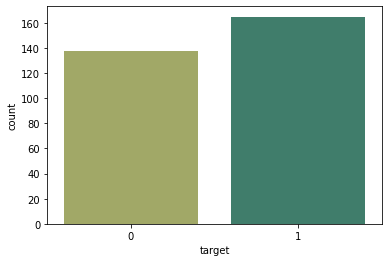

In [ ]:
sns.countplot(x='target', data=df, palette='gist_earth_r')
plt.show()

In [ ]:
countNoDisease = len(df[df.target==0])
countHaveDisease = len(df[df.target==1])
print("Процент пациентов без болезни сердца: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Процент пациентов с болезнью сердца: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Процент пациентов без болезни сердца: 45.54%
Процент пациентов с болезнью сердца: 54.46%


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


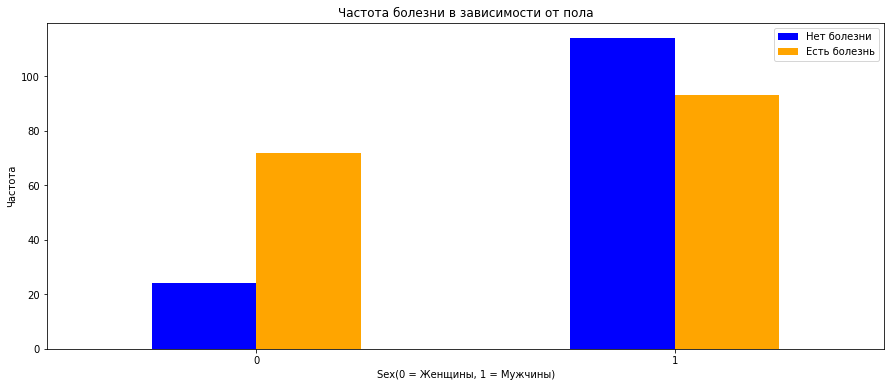

In [ ]:
# MALE vs FEMALE
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15,6),color=['blue', 'orange'])
plt.title('Частота болезни в зависимости от пола')
plt.xlabel('Sex(0 = Женщины, 1 = Мужчины)')
plt.xticks(rotation=0)
plt.legend(["Нет болезни", "Есть болезнь"])
plt.ylabel('Частота')
plt.show()

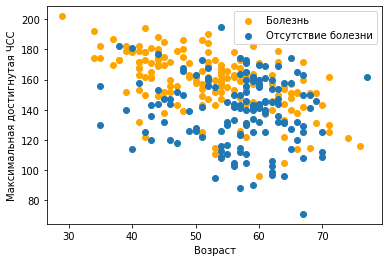

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='orange')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(['Болезнь', 'Отсутствие болезни'])
plt.xlabel('Возраст')
plt.ylabel('Максимальная достигнутая ЧСС')
plt.show()

In [ ]:
#Создаем фиктивные(dummy) переменные
#'cp', 'thal'и'slope' - категориальные переменные, превращаем их в фиктивные.
a = pd.get_dummies(df['cp'], prefix='cp')
b = pd.get_dummies(df['thal'], prefix='thal')
c = pd.get_dummies(df['slope'], prefix='slope')

In [ ]:
frames = [df,a,b,c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


Разделяем данные

In [ ]:
x = df.drop(['target'], axis=1)
y = df['target']

In [ ]:
x.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
print(x.shape, X_train.shape, X_test.shape)

(303, 21) (242, 21) (61, 21)


# Модели машинного обучения
Рассмотрим точность нескольких алгоритмов машинного обучения, исходя из данных речь идет о задаче классификации

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
acc_lr = round(lr.score(X_train, y_train)*100, 2)
print(str(acc_lr)+ ' Percentage')

86.36 Percentage


Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
acc_svc = round(svc.score(X_train, y_train)*100, 2)
print(str(acc_svc)+' Percentage')

66.53 Percentage


K-Nearest Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train)*100, 2)
print(str(acc_knn)+' Percentage')

78.1 Percentage


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
acc_dt = round(dt.score(X_train, y_train)*100, 2)
print(str(acc_dt)+' Percentage')

100.0 Percentage


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
acc_rf = round(rf.score(X_train, y_train)*100, 2)
print(str(acc_rf)+' Percentage')

100.0 Percentage


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
acc_nb = round(nb.score(X_train, y_train)*100, 2)
print(str(acc_nb)+' Percentage')

84.71 Percentage


Сравниваем  точность моделей (accuracy score)



In [ ]:
models = pd.DataFrame({
    'Models':['Logistic Regression', 'Support Vector', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Score':[acc_lr, acc_svc, acc_knn, acc_dt, acc_rf, acc_nb]
})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Decision Tree,100.00
4,Random Forest,100.00
0,Logistic Regression,86.36
5,Naive Bayes,84.71
2,KNN,78.10
1,Support Vector,66.53


Из таблицы следует, что Decision Tree и RandomForest дают 100% точность (accuracy), оценки основаны на тренировочном наборах данных (Train datasets).

Проверим accuracy_score на тестовом наборе данных(TEST data).



In [ ]:
from sklearn.metrics import accuracy_score

Применяем метод predict ко всем алгоритмам

In [ ]:
lr_pred = lr.predict(X_test) #Logistic Regression
svm_pred = svc.predict(X_test) #Support Vector
knn_pred = knn.predict(X_test) #K-Nearest
dt_pred = dt.predict(X_test) #Decision Tree
rf_pred = rf.predict(X_test) #Random Forest
nb_pred = rf.predict(X_test) #Naive Bayes

Поверяем точность оценок (accuracy_score) на тестовых данных

In [ ]:
test_lr = round(accuracy_score(lr_pred, y_test)*100,2)
test_svm = round(accuracy_score(svm_pred, y_test)*100,2)
test_knn = round(accuracy_score(knn_pred, y_test)*100,2)
test_dt = round(accuracy_score(dt_pred, y_test)*100,2)
test_rf = round(accuracy_score(rf_pred, y_test)*100,2)
test_nb = round(accuracy_score(nb_pred, y_test)*100,2)

test_models = pd.DataFrame({
    'Models':['Logistic Regression', 'Support Vector', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Score(Test Data)':[test_lr, test_svm, test_knn, test_dt, test_rf, test_nb]
})

test_models.sort_values(by='Score(Test Data)', ascending=False)

,Models,Score(Test Data)
4,Random Forest,86.89
5,Naive Bayes,86.89
0,Logistic Regression,85.25
3,Decision Tree,78.69
1,Support Vector,68.85
2,KNN,63.93


Очевидно, что Logistic Regression имееет большую точность. Оценим нашу модель, используя Logistic Regression.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report

In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Confusion Matrix - Матрица ошибок

In [ ]:
cm = confusion_matrix(y_test, lr_pred)
cm

array([[22,  5],
       [ 4, 30]])

Visualize¶

Text(0.5, 1.0, 'Confusion Matrix')

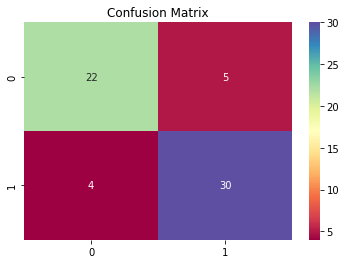

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, cmap = "Spectral", annot=True)
plt.title('Confusion Matrix')

Построение прогностической модели



In [ ]:
input_data = (34, 1, 140,230,0,1,170,1, 3.2, 1, 1,0,0,0,0,1,0,0,0,0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


DATA FOR PERSON DOES NOT HAVE A HEART DISEASE

34, 1, 140,230,0,1,170,1, 3.2, 1, 1,0,0,0,0,1,0,0,0,0,1

DATA FOR PERSON HAS A HEART DISEASE

54, 0,132,200,1,0,220,0,4.2,0,0,1,1,1,1,0,1,1,1,1,0

**Предсказание болезни сердца, используя нейронные сети**   



In [ ]:
import keras
import sklearn
import matplotlib

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Pandas: 1.1.5
Numpy: 1.19.5
Sklearn: 0.23.2
Matplotlib: 3.2.2
Keras: 2.6.0


In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(df.shape))
print (df.loc[1])

Shape of DataFrame: (303, 22)
age          37.0
sex           1.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
ca            0.0
target        1.0
cp_0          0.0
cp_1          0.0
cp_2          1.0
cp_3          0.0
thal_0        0.0
thal_1        0.0
thal_2        1.0
thal_3        0.0
slope_0       1.0
slope_1       0.0
slope_2       0.0
Name: 1, dtype: float64


In [ ]:
# print the last twenty or so data 
df.loc[280:]

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
280,42,1,136,315,0,1,125,1,1.8,0,0,1,0,0,0,0,1,0,0,0,1,0
281,52,1,128,204,1,1,156,1,1.0,0,0,1,0,0,0,1,0,0,0,0,1,0
282,59,1,126,218,1,1,134,0,2.2,1,0,0,0,1,0,0,1,0,0,0,1,0
283,40,1,152,223,0,1,181,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1
284,61,1,140,207,0,0,138,1,1.9,1,0,1,0,0,0,0,0,0,1,0,0,1
285,46,1,140,311,0,1,120,1,1.8,2,0,1,0,0,0,0,0,0,1,0,1,0
286,59,1,134,204,0,1,162,0,0.8,2,0,0,0,0,1,0,0,1,0,0,0,1
287,57,1,154,232,0,0,164,0,0.0,1,0,0,1,0,0,0,0,1,0,0,0,1
288,57,1,110,335,0,1,143,1,3.0,1,0,1,0,0,0,0,0,0,1,0,1,0
289,55,0,128,205,0,2,130,1,2.0,1,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
# remove missing data (indicated with a "?")
data = df[~df.isin(['?'])]
data.loc[280:]

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
280,42,1,136,315,0,1,125,1,1.8,0,0,1,0,0,0,0,1,0,0,0,1,0
281,52,1,128,204,1,1,156,1,1.0,0,0,1,0,0,0,1,0,0,0,0,1,0
282,59,1,126,218,1,1,134,0,2.2,1,0,0,0,1,0,0,1,0,0,0,1,0
283,40,1,152,223,0,1,181,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1
284,61,1,140,207,0,0,138,1,1.9,1,0,1,0,0,0,0,0,0,1,0,0,1
285,46,1,140,311,0,1,120,1,1.8,2,0,1,0,0,0,0,0,0,1,0,1,0
286,59,1,134,204,0,1,162,0,0.8,2,0,0,0,0,1,0,0,1,0,0,0,1
287,57,1,154,232,0,0,164,0,0.0,1,0,0,1,0,0,0,0,1,0,0,0,1
288,57,1,110,335,0,1,143,1,3.0,1,0,1,0,0,0,0,0,0,1,0,1,0
289,55,0,128,205,0,2,130,1,2.0,1,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
280,42,1,136,315,0,1,125,1,1.8,0,0,1,0,0,0,0,1,0,0,0,1,0
281,52,1,128,204,1,1,156,1,1.0,0,0,1,0,0,0,1,0,0,0,0,1,0
282,59,1,126,218,1,1,134,0,2.2,1,0,0,0,1,0,0,1,0,0,0,1,0
283,40,1,152,223,0,1,181,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1
284,61,1,140,207,0,0,138,1,1.9,1,0,1,0,0,0,0,0,0,1,0,0,1
285,46,1,140,311,0,1,120,1,1.8,2,0,1,0,0,0,0,0,0,1,0,1,0
286,59,1,134,204,0,1,162,0,0.8,2,0,0,0,0,1,0,0,1,0,0,0,1
287,57,1,154,232,0,0,164,0,0.0,1,0,0,1,0,0,0,0,1,0,0,0,1
288,57,1,110,335,0,1,143,1,3.0,1,0,1,0,0,0,0,0,0,1,0,1,0
289,55,0,128,205,0,2,130,1,2.0,1,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(303, 22)
age           int64
sex           int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
ca            int64
target        int64
cp_0          uint8
cp_1          uint8
cp_2          uint8
cp_3          uint8
thal_0        uint8
thal_1        uint8
thal_2        uint8
thal_3        uint8
slope_0       uint8
slope_1       uint8
slope_2       uint8
dtype: object


In [ ]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
ca            int64
target        int64
cp_0          uint8
cp_1          uint8
cp_2          uint8
cp_3          uint8
thal_0        uint8
thal_1        uint8
thal_2        uint8
thal_3        uint8
slope_0       uint8
slope_1       uint8
slope_2       uint8
dtype: object

In [ ]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,0.729373,0.544554,0.471947,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139,0.069307,0.462046,0.468647
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,1.022606,0.498835,0.500038,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668,0.254395,0.499382,0.499842
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


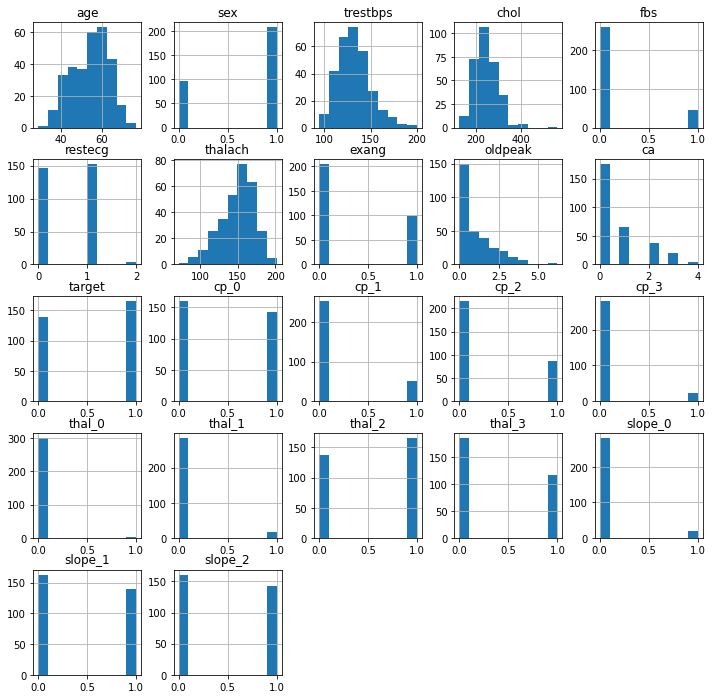

In [ ]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

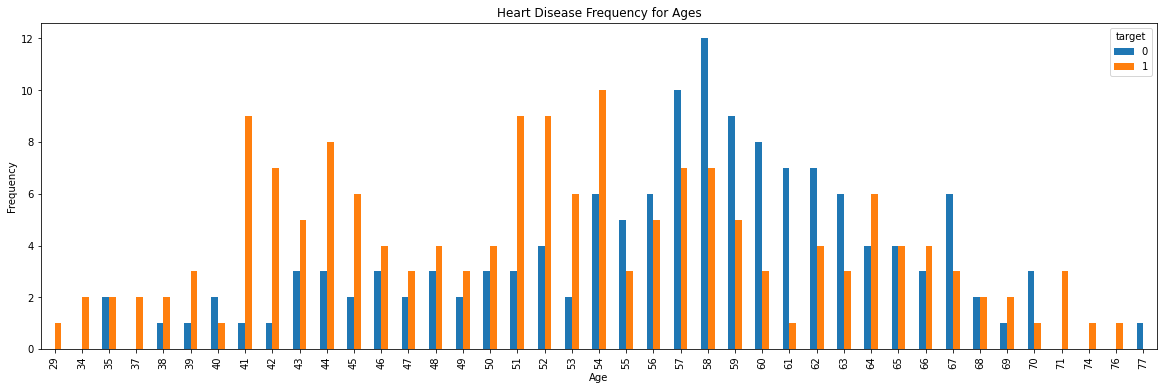

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

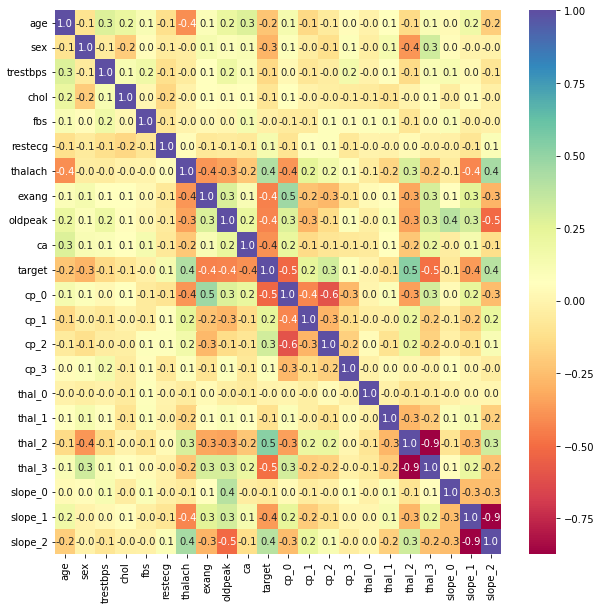

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap = "Spectral", annot=True,fmt='.1f')
plt.show()

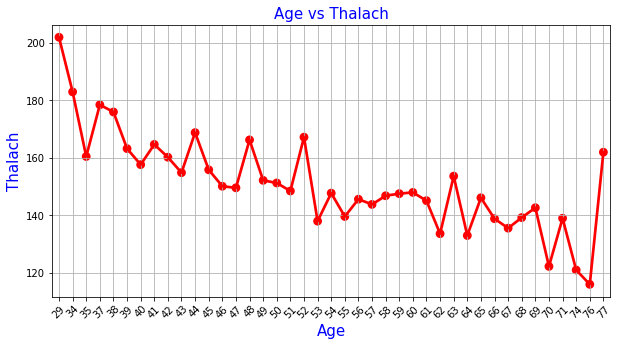

In [ ]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

2.Создаем два набора данных Training и Testing Datasets
Данные предварительно подготовлены, разделяем их на два набора training и testings. Используем функцию Sklearn's train_test_split() для генерации тренировочного набора данных (80 процентов всех данных) и тестирующего набора (20 процентов всех данных).

In [ ]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

In [ ]:
X[0]

array([ 63. ,   1. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,   2.3,
         0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   1. ,   0. ,   0. ,
         1. ,   0. ,   0. ])

In [ ]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [ ]:
X[0]

array([ 0.9521966 ,  0.68100522,  0.76395577, -0.25633371,  2.394438  ,
       -1.00583187,  0.01544279, -0.69663055,  1.08733806, -0.71442887,
       -0.94538352, -0.44455422, -0.63464776,  3.4891135 , -0.08151391,
        3.97911213, -1.10076284, -0.79311554,  3.66450153, -0.92676626,
       -0.93914194])

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [ ]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
X_train[0]

array([ 1.61392956, -1.46841752,  0.47839125, -0.14038081, -0.41763453,
        0.89896224,  0.05917329, -0.69663055,  0.65599028,  1.24459328,
       -0.94538352, -0.44455422, -0.63464776,  3.4891135 , -0.08151391,
       -0.25131234,  0.9084609 , -0.79311554, -0.27288841, -0.92676626,
        1.06480177])

# Построение и тренировка нейронной сети
Данные полностью обработаны и расщеплены на два набора (training и testing)Строим простую нейроннную сеть для решеня задачи классификации. Определим в keras один скрытый слой. В задаче категориальной классификации будем использовать для активации функцию softmax в последнем слое нашей сети и  loss = categorical_crossentropy для тренировочной фазы.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Dropout
from keras import regularizers

    

In [ ]:
# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_13 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


# К сожалению Keras глючит в среде Colab!!!!

In [ ]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

NameError: ignored

In [ ]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Пробуем улучшить результат -  Binary Classification.
Попробуем минимизировать ошибку мведя задачу к бинарной классификации,    т.е еть болезнь сердца или нет (heart disease/no heart disease).

In [ ]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [ ]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_11 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

NameError: ignored

In [ ]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Результаты и метрики

Точность приводится для обучающего набора данныхю
Сделаем

Let's test the performance of both our categorical model and binary model. To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

In [ ]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

H2O AutoML

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
!pip install h2o

     |████████████████████████████████| 175.8 MB 38 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.1-py2.py3-none-any.whl size=175823552 sha256=40219dc5c0530b073d14e89ea4e71941a8773058c385005feceaa835a58cf411
  Stored in directory: /root/.cache/pip/wheels/5c/7b/60/014a2b6d009793271276a9a41cb954659c8f23b8823ca21625
Successfully built h2o


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpi9s90td3
  JVM stdout: /tmp/tmpi9s90td3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpi9s90td3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_rkt9br
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
heart_df = h2o.import_file('/content/drive/MyDrive/heart.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
heart_df.types

{'ca': 'int',
 'chol': 'int',
 'cp': 'int',
 'exang': 'int',
 'fbs': 'int',
 'oldpeak': 'real',
 'restecg': 'int',
 'sex': 'int',
 'slope': 'int',
 'target': 'int',
 'thal': 'int',
 'thalach': 'int',
 'trestbps': 'int',
 '\ufeffage': 'int'}

In [ ]:
heart_df.describe()

Rows:303
Cols:14




,﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
type,int,int,int,int,int,int,int,int,int,real,int,int,int,int
mins,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,54.36633663366333,0.6831683168316832,0.9669966996699675,131.62376237623772,246.26402640264035,0.1485148514851485,0.5280528052805283,149.6468646864687,0.32673267326732675,1.0396039603960392,1.3993399339933994,0.7293729372937293,2.313531353135314,0.5445544554455446
maxs,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
sigma,9.08210098983786,0.46601082333962385,1.0320524894832983,17.538142813517098,51.83075098793005,0.35619787492797644,0.525859596359298,22.905161114914087,0.4697944645223165,1.1610750220686346,0.6162261453459621,1.0226063649693276,0.6122765072781408,0.49883478416439136
zeros,0,96,143,0,0,258,147,0,204,99,21,175,2,138
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0


In [ ]:
heart_train,heart_test,heart_valid = heart_df.split_frame(ratios=[.7, .15])

In [ ]:
heart_train

﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
49,1,1,130,266,0,1,171,0,0.6,2,0,2,1


In [ ]:
y = "target"
x = heart_df.columns
x.remove(y)
#x.remove("target")

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
aml.train(x = x, y = y, training_frame = heart_train, validation_frame=heart_valid)

AutoML progress: |
17:34:17.233: Project: AutoML_1_20211003_173417
17:34:17.234: Cross-validation disabled by user: no fold column nor nfolds > 1.
17:34:17.253: Setting stopping tolerance adaptively based on the training frame: 0.05
17:34:17.254: Build control seed: 10
17:34:17.254: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
17:34:17.300: training frame: Frame key: AutoML_1_20211003_173417_training_py_2_sid_872c    cols: 14    rows: 190  chunks: 1    size: 3640  checksum: 7951876320958735936
17:34:17.300: validation frame: Frame key: py_4_sid_872c    cols: 14    rows: 37  chunks: 1    size: 1352  checksum: -2475498058763097984
17:34:17.304: leaderboard frame: Frame key: AutoML_1_20211003_173417_leaderboard_py_2_sid_872c    cols: 14    rows: 25  chunks: 1    size: 1352  checksum: -8095990389460490880
17:34:17.305: blending frame: NULL
17:34:17.305: response colum

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,40.0,40.0,8083.0,4.0,8.0,5.475,9.0,13.0,11.45




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.03798672208691844
RMSE: 0.19490182679215307
MAE: 0.13924640836439242
RMSLE: 0.14212733550881212
Mean Residual Deviance: 0.03798672208691844

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.11651980731511066
RMSE: 0.34134997775759507
MAE: 0.24480024942349343
RMSLE: 0.24471629940071024
Mean Residual Deviance: 0.11651980731511066

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-10-03 17:34:23,0.003 sec,0.0,0.499307,0.498615,0.249307,0.499981,0.499289,0.249981
1,,2021-10-03 17:34:23,0.044 sec,5.0,0.395690,0.386475,0.156570,0.412097,0.398769,0.169824
2,,2021-10-03 17:34:23,0.076 sec,10.0,0.331322,0.309089,0.109775,0.369872,0.337086,0.136805
3,,2021-10-03 17:34:23,0.101 sec,15.0,0.286754,0.247891,0.082228,0.342881,0.284744,0.117567
4,,2021-10-03 17:34:23,0.127 sec,20.0,0.258702,0.207456,0.066927,0.333991,0.255183,0.111550
5,,2021-10-03 17:34:23,0.166 sec,25.0,0.237105,0.179188,0.056219,0.332643,0.242904,0.110651
6,,2021-10-03 17:34:23,0.205 sec,30.0,0.220836,0.161473,0.048768,0.333256,0.242937,0.111060
7,,2021-10-03 17:34:23,0.238 sec,35.0,0.207176,0.149092,0.042922,0.336743,0.242729,0.113396
8,,2021-10-03 17:34:23,0.275 sec,40.0,0.194902,0.139246,0.037987,0.341350,0.244800,0.116520



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,thal,52.632057,1.000000,0.256279
1,oldpeak,37.640770,0.715168,0.183283
2,ca,23.694967,0.450200,0.115377
3,cp,20.331762,0.386300,0.099001
4,chol,14.544971,0.276352,0.070823
5,thalach,13.814918,0.262481,0.067268
6,﻿age,11.341784,0.215492,0.055226
7,sex,8.202390,0.155844,0.039940
8,trestbps,7.233271,0.137431,0.035221
9,slope,6.074378,0.115412,0.029578


In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_3_AutoML_1_20211003_173417,0.076083,0.275832,0.076083,0.197375,0.193197
GBM_4_AutoML_1_20211003_173417,0.0774921,0.278374,0.0774921,0.197307,0.198782
DRF_1_AutoML_1_20211003_173417,0.0841143,0.290025,0.0841143,0.205714,0.209343
XGBoost_2_AutoML_1_20211003_173417,0.0940182,0.306624,0.0940182,0.224938,0.218893
GBM_2_AutoML_1_20211003_173417,0.0958092,0.309531,0.0958092,0.222638,0.215853
XGBoost_1_AutoML_1_20211003_173417,0.101095,0.317954,0.101095,0.251211,0.224444
GLM_1_AutoML_1_20211003_173417,0.104502,0.323268,0.104502,0.271301,0.226086
XRT_1_AutoML_1_20211003_173417,0.10781,0.328345,0.10781,0.248906,0.234191
GBM_5_AutoML_1_20211003_173417,0.123427,0.351322,0.123427,0.217668,0.245123
XGBoost_3_AutoML_1_20211003_173417,0.148853,0.385815,0.148853,0.280637,0.276142


In [ ]:
heart_pred=aml.leader.predict(heart_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
heart_pred.head()

predict
0.549112
0.478005
0.578388
0.697196
0.617077
1.12831
0.726
1.06986
0.816906
1.02332


In [ ]:
aml.leader.model_performance(heart_test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.1774716816360073
RMSE: 0.42127387960329005
MAE: 0.3274979695973601
RMSLE: 0.2909706034911587
Mean Residual Deviance: 0.1774716816360073


In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [ ]:
model_ids

['GBM_3_AutoML_1_20211003_173417',
 'GBM_4_AutoML_1_20211003_173417',
 'DRF_1_AutoML_1_20211003_173417',
 'XGBoost_2_AutoML_1_20211003_173417',
 'GBM_2_AutoML_1_20211003_173417',
 'XGBoost_1_AutoML_1_20211003_173417',
 'GLM_1_AutoML_1_20211003_173417',
 'XRT_1_AutoML_1_20211003_173417',
 'GBM_5_AutoML_1_20211003_173417',
 'XGBoost_3_AutoML_1_20211003_173417']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_1_20211003_173417


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.00940840352522801
RMSE: 0.09699692533904365
MAE: 0.06821439234833969
RMSLE: 0.07257342902701533
Mean Residual Deviance: 0.00940840352522801

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.16859574564376
RMSE: 0.41060412277978897
MAE: 0.30815584031311244
RMSLE: 0.3028372008253799
Mean Residual Deviance: 0.16859574564376

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-10-03 17:34:20,0.002 sec,0.0,0.500000,0.500000,0.250000,0.500000,0.500000,0.250000
1,,2021-10-03 17:34:20,0.102 sec,5.0,0.294868,0.247048,0.086947,0.392717,0.325231,0.154227
2,,2021-10-03 17:34:20,0.158 sec,10.0,0.214638,0.158681,0.046069,0.394633,0.303048,0.155736
3,,2021-10-03 17:34:20,0.195 sec,15.0,0.161748,0.117727,0.026162,0.400349,0.297386,0.160279
4,,2021-10-03 17:34:20,0.247 sec,20.0,0.133331,0.096817,0.017777,0.414433,0.313337,0.171755
5,,2021-10-03 17:34:20,0.301 sec,25.0,0.114860,0.080508,0.013193,0.412832,0.306584,0.170430
6,,2021-10-03 17:34:20,0.349 sec,30.0,0.096997,0.068214,0.009408,0.410604,0.308156,0.168596



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,oldpeak,16.826395,1.000000,0.211338
1,thalach,9.957850,0.591799,0.125070
2,chol,8.581900,0.510026,0.107788
3,thal,7.300223,0.433855,0.091690
4,ca,7.049131,0.418933,0.088537
5,cp,6.219420,0.369623,0.078115
6,﻿age,6.179091,0.367226,0.077609
7,trestbps,5.274007,0.313437,0.066241
8,restecg,4.195555,0.249344,0.052696
9,sex,3.544757,0.210666,0.044522


In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'gpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'gaussian', 'default': 'AUTO', '

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 10,
  'min_child_weight': 5.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'reg:squarederror',
  'seed': 13,
  'silent': True,
  'subsample': 0.6,
  'updater': 'grow_gpu_hist'},
 10000)

In [ ]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_1_20211003_173417


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.00940840352522801
RMSE: 0.09699692533904365
MAE: 0.06821439234833969
RMSLE: 0.07257342902701533
Mean Residual Deviance: 0.00940840352522801

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.16859574564376
RMSE: 0.41060412277978897
MAE: 0.30815584031311244
RMSLE: 0.3028372008253799
Mean Residual Deviance: 0.16859574564376

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-10-03 17:34:20,0.002 sec,0.0,0.500000,0.500000,0.250000,0.500000,0.500000,0.250000
1,,2021-10-03 17:34:20,0.102 sec,5.0,0.294868,0.247048,0.086947,0.392717,0.325231,0.154227
2,,2021-10-03 17:34:20,0.158 sec,10.0,0.214638,0.158681,0.046069,0.394633,0.303048,0.155736
3,,2021-10-03 17:34:20,0.195 sec,15.0,0.161748,0.117727,0.026162,0.400349,0.297386,0.160279
4,,2021-10-03 17:34:20,0.247 sec,20.0,0.133331,0.096817,0.017777,0.414433,0.313337,0.171755
5,,2021-10-03 17:34:20,0.301 sec,25.0,0.114860,0.080508,0.013193,0.412832,0.306584,0.170430
6,,2021-10-03 17:34:20,0.349 sec,30.0,0.096997,0.068214,0.009408,0.410604,0.308156,0.168596



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,oldpeak,16.826395,1.000000,0.211338
1,thalach,9.957850,0.591799,0.125070
2,chol,8.581900,0.510026,0.107788
3,thal,7.300223,0.433855,0.091690
4,ca,7.049131,0.418933,0.088537
5,cp,6.219420,0.369623,0.078115
6,﻿age,6.179091,0.367226,0.077609
7,trestbps,5.274007,0.313437,0.066241
8,restecg,4.195555,0.249344,0.052696
9,sex,3.544757,0.210666,0.044522


In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
#out.confusion_matrix()

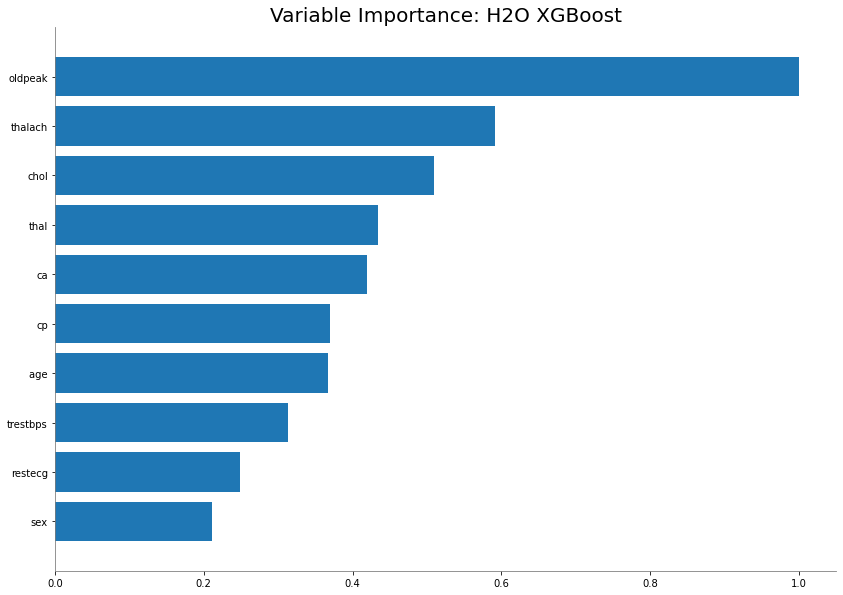

In [ ]:
out.varimp_plot()